In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.metrics import mean_squared_error

In [ ]:
dt = pd.read_csv("covid_19_india.csv")

In [ ]:
dt['Date'] = pd.to_datetime(dt['Date'],infer_datetime_format=True)
dt = dt.set_index(['Date'])

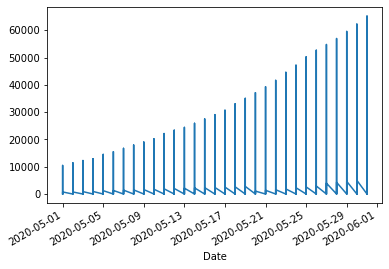

In [ ]:
dt['2020-05']['Confirmed'].plot()

In [ ]:
df = dt.groupby(level=0)['Confirmed'].sum()
df= pd.DataFrame(df)

In [ ]:
df['Deaths'] = dt.groupby(level=0)['Deaths'].sum()

In [ ]:
df['Cured'] = dt.groupby(level=0)['Cured'].sum()

In [ ]:
df

,Confirmed,Deaths,Cured,first diff,second diff,log difference
Date,,,,,,
2020-01-30,1,0,0,NaN,NaN,NaN
2020-01-31,1,0,0,0.0,NaN,NaN
2020-02-01,2,0,0,0.0,0.0,NaN
2020-02-02,3,0,0,0.0,0.0,NaN
2020-02-03,3,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...
2020-10-23,7761312,117306,6948497,690.0,-12.0,0.005899
2020-10-24,7814682,117956,7016046,650.0,-40.0,0.005526
2020-10-25,7864811,118534,7078123,578.0,-72.0,0.004888


In [ ]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))


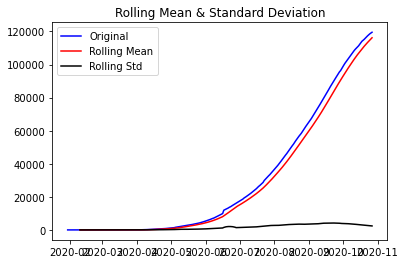

ADF Statistic: -3.57971442481203
p-value: 0.006160899147961239
Critical Values:
	1%: -3.4554613060274972
	5%: -2.8725931472675046
	10%: -2.5726600403359887


In [ ]:
get_stationarity(df['Deaths'])

In [ ]:
df['first diff'] = df['Deaths'] - df['Deaths'].shift(1)

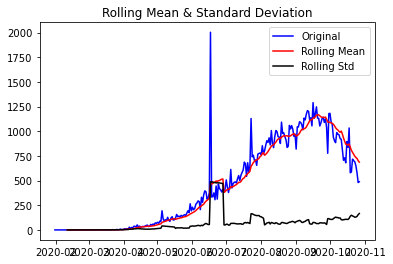

ADF Statistic: -1.0478777180050671
p-value: 0.7354041758243484
Critical Values:
	1%: -3.455365238788105
	5%: -2.8725510317187024
	10%: -2.5726375763314966


In [ ]:
get_stationarity(df['first diff'].dropna())

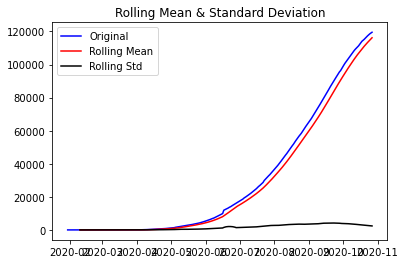

ADF Statistic: -3.57971442481203
p-value: 0.006160899147961239
Critical Values:
	1%: -3.4554613060274972
	5%: -2.8725931472675046
	10%: -2.5726600403359887


In [ ]:
get_stationarity(df['Deaths'])

In [ ]:
df['second diff'] = df['first diff']-df['first diff'].shift(1)

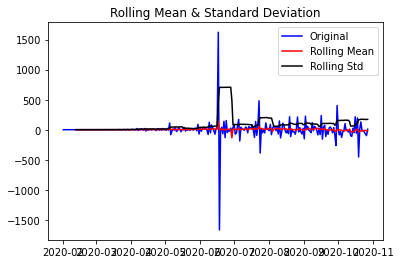

ADF Statistic: -11.293533005288504
p-value: 1.3612339045911683e-20
Critical Values:
	1%: -3.455365238788105
	5%: -2.8725510317187024
	10%: -2.5726375763314966


In [ ]:
get_stationarity(df['second diff'].dropna())

Second difference comes out to be stationary

In [ ]:
df['log difference'] = np.log(df['Deaths']/df['Deaths'].shift(1))

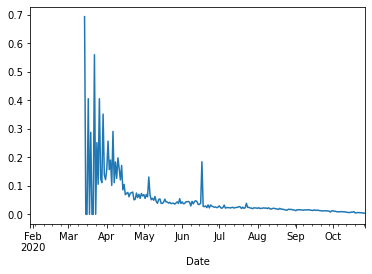

In [ ]:
df['log difference'].plot()

In [ ]:
f = df['log difference'].dropna()
get_stationarity(df['log difference'].dropna())

AttributeError: 'NoneType' object has no attribute 'rolling'

In [ ]:
df['log difference'].dropna(inplace=True)


In [ ]:
df['log difference'].dropna()


Date
2020-03-13         inf
2020-03-14    0.693147
2020-03-15    0.000000
2020-03-16    0.000000
2020-03-17    0.405465
                ...   
2020-10-23    0.005899
2020-10-24    0.005526
2020-10-25    0.004888
2020-10-26    0.004041
2020-10-27    0.004092
Name: log difference, Length: 229, dtype: float64

log of first difference is also not stationary

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot

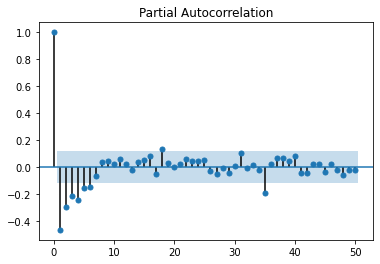

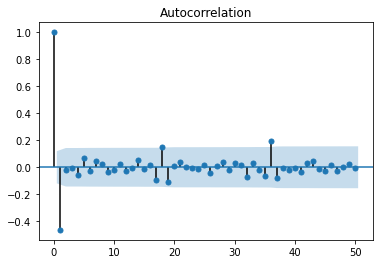

In [ ]:
plot_pacf(df['second diff'].dropna(),lags=50)
plot_acf(df['second diff'].dropna(),lags=50)
pyplot.show()

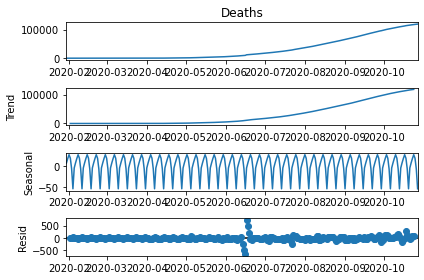

In [ ]:
result = seasonal_decompose(df['Deaths'].dropna(), model='additive')
result.plot()
pyplot.show()

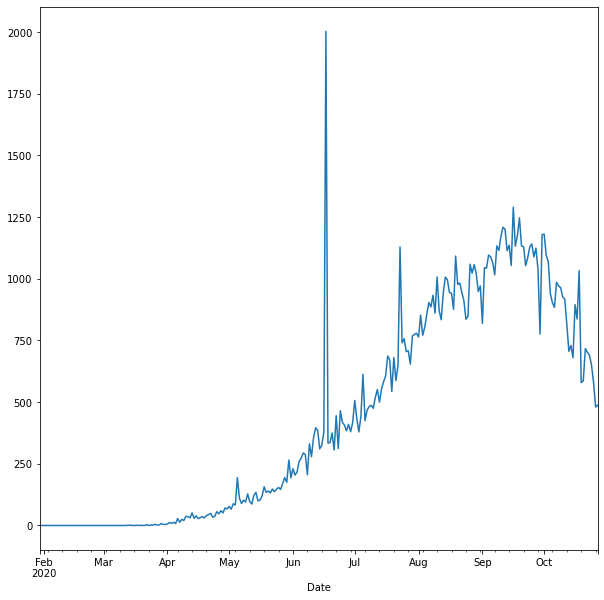

In [ ]:
df['first diff'].plot(figsize=(10,10))

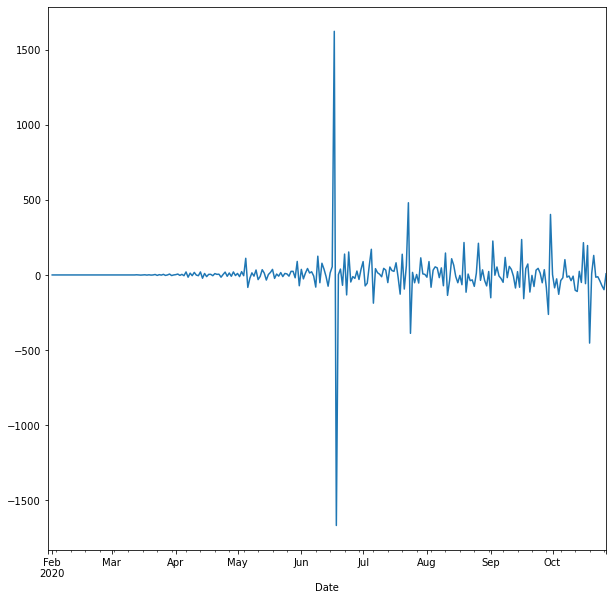

In [ ]:
df['second diff'].plot(figsize=(10,10))

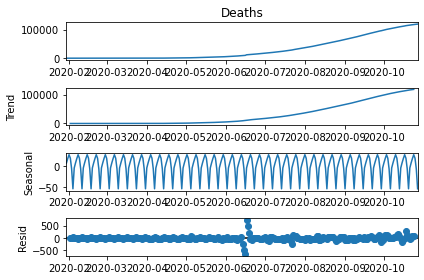

In [ ]:
result = seasonal_decompose(df['Deaths'].dropna(), model='additive')
result.plot()
pyplot.show()

In [ ]:
date = pd.to_datetime('2020-10-20')

In [ ]:
train = df['first diff'][:date].dropna()
test = df['first diff'][date:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
model = SARIMAX(train,order=(0,1,1))

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [ ]:
res = model.fit(disp=True)


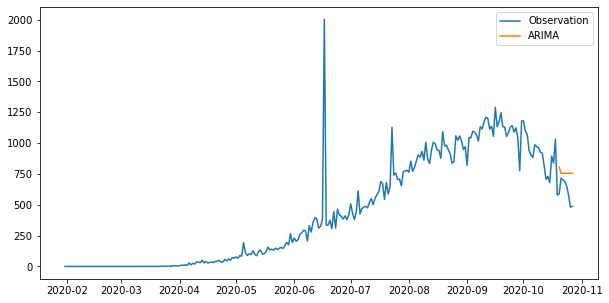

In [ ]:
sarimax_prediction = res.predict(start=date,end='2020-10-27',dynamic=False)
plt.figure(figsize=(10,5))
l1, = plt.plot(df['first diff'],label='Observation')
l2, = plt.plot(sarimax_prediction,label='ARIMA')
plt.legend(handles=[l1,l2])


MAE

In [ ]:
import pmdarima as pm
model = pm.auto_arima(train,start_p=1,start_q=1,test='adf',max_p=4,max_q=4,m=1,start_d=1,max_d=4,seasonal=False,start_P=0,D=0,trace=True,error_action='ignore',stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3246.364, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3365.586, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3303.660, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3244.366, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3363.653, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3246.363, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3248.350, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3245.412, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.674 seconds


In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1619.183
Date:                Tue, 24 Nov 2020   AIC                           3244.366
Time:                        01:33:59   BIC                           3255.024
Sample:                             0   HQIC                          3248.652
                                - 259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.2357      3.044      1.063      0.288      -2.731       9.202
ma.L1         -0.7840      0.023    -34.407      0.000      -0.829      -0.739
sigma2      1.649e+04    329.689     50.007      0.0

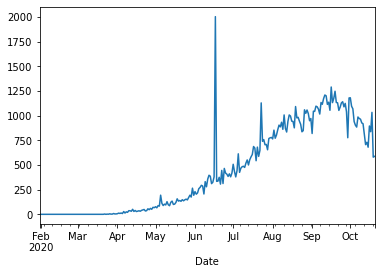

In [ ]:
train.plot()

In [ ]:
dt = pd.read_csv('time_series_covid19_deaths_global.csv')

In [ ]:
d = dt.loc[:,'1/22/20':]

In [ ]:
d = d.transpose()

In [ ]:
d = d.sum(axis=1)

In [ ]:
pd.DataFrame(d)

,0
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56
...,...
8/12/20,743989
8/13/20,750230
8/14/20,760374
8/15/20,765718


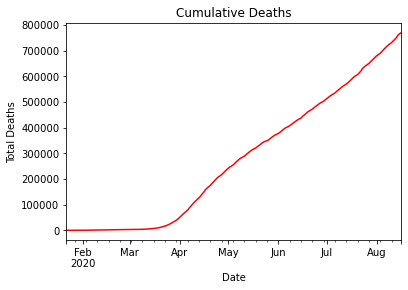

In [ ]:
d.index = pd.to_datetime(d.index,infer_datetime_format=True)
# dt = dt.set_index(['Date'])
d['Deaths'].plot(color='red',title='Cumulative Deaths',x='Time',y = 'Total Number of Deaths')
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.savefig('Cumplot.png')


In [ ]:
d = pd.DataFrame(d)

In [ ]:
d = d.rename(columns={'0':'Date','1':'Deaths'},inplace=False)

In [ ]:
d.columns = ['Deaths']

In [ ]:
dat = pd.to_datetime('2020-07-31')

In [ ]:
d['first diff'] = d['Deaths'] - d['Deaths'].shift(1)

In [ ]:
train = d['first diff'][:dat].dropna()
test = d['first diff'][dat:]

In [ ]:
model = SARIMAX(train,order=(2,1,3))

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [ ]:
res = model.fit(disp=True)


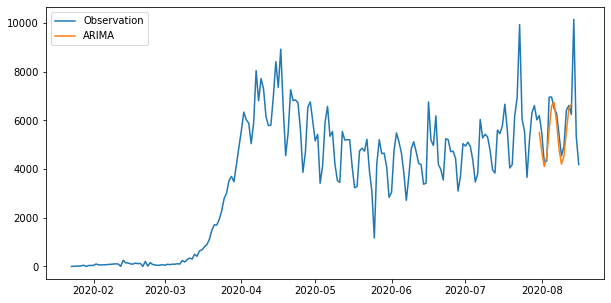

In [ ]:
sarimax_prediction = res.predict(start=dat,end='2020-08-13',dynamic=False)
plt.figure(figsize=(10,5))
l1, = plt.plot(d['first diff'],label='Observation')
l2, = plt.plot(sarimax_prediction,label='ARIMA')
plt.legend(handles=[l1,l2])

In [ ]:
import pmdarima as pm
model = pm.auto_arima(train,start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=False,start_P=0,D=0,trace=True,error_action='ignore',stepwise=True)

Performing stepwise search to minimize aic


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3127.183, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3147.892, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3149.289, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3148.818, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3146.119, Time=0.02 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3114.837, Time=0.67 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3143.650, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3105.273, Time=0.71 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3132.135, Time=0.14 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3059.230, Time=1.08 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3056.692, Time=0.84 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3121.738, Time=0.74 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3041.399, Time=1.03 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3047.385, Time=1.15 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=3040.936, Time=0.92 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.53 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-pack

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3054.788, Time=0.69 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=3046.173, Time=0.96 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3121.579, Time=0.41 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3046.601, Time=0.84 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0]          
Total fit time: 12.313 seconds


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  191
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1514.468
Date:                Tue, 24 Nov 2020   AIC                           3040.936
Time:                        02:08:51   BIC                           3060.418
Sample:                             0   HQIC                          3048.828
                                - 191                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2456      0.017     72.350      0.000       1.212       1.279
ar.L2         -0.9805      0.019    -50.893      0.000      -1.018      -0.943
ma.L1         -1.7757      0.065    -27.387      0.000      -1.903      -1.649
ma.L2          1.4842      0.097     15.342      0.000       1.295       1.674
ma.L3         -0.4013      0.064     -6.302      0.000      -0.526      -0.276
sigma2      5.046e+05   3.73e+04     13.530      0.000    4.32e+05    5.78e+05
===================================================================================
Ljung-Box (Q):                      212.26   Jarque-Bera (JB):                93.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.48   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
d['second diff'] = d['first diff'] - d['first diff'].shift(1)

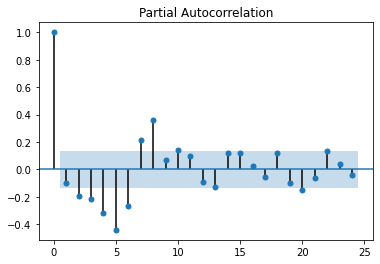

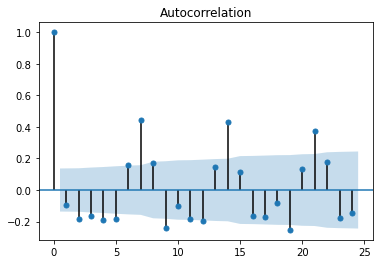

In [ ]:
plot_pacf(d['second diff'].dropna())
plot_acf(d['second diff'].dropna())
pyplot.show()

In [ ]:
d

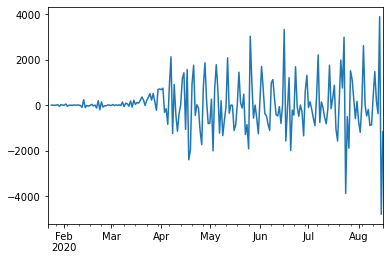

In [ ]:
d['second diff'].plot()

In [ ]:
d['second diff']

2020-01-22       NaN
2020-01-23       NaN
2020-01-24       7.0
2020-01-25       8.0
2020-01-26      -2.0
               ...  
2020-08-12     190.0
2020-08-13    -368.0
2020-08-14    3903.0
2020-08-15   -4800.0
2020-08-16   -1158.0
Name: second diff, Length: 208, dtype: float64

In [ ]:
dt = pd.read_csv('time_series_covid19_deaths_global_new.csv')

In [ ]:
dd = dt.loc[:,'1/22/20':]

In [ ]:
dd = dd.transpose()

In [ ]:
dd = dd.sum(axis=1)

In [ ]:
dd

1/22/20          17
1/23/20          18
1/24/20          26
1/25/20          42
1/26/20          56
             ...   
11/18/20    1349380
11/19/20    1360381
11/20/20    1372182
11/21/20    1380436
11/22/20    1388068
Length: 306, dtype: int64

In [ ]:
dd = pd.DataFrame(dd)

In [ ]:
dd.index = pd.to_datetime(dd.index,infer_datetime_format=True)

In [ ]:
dd = dd.rename(columns={'0':'Date','1':'Deaths'},inplace=False)

In [ ]:
dd.columns = ['Deaths']

In [ ]:
dd['seasonal first diff'] = dd['first diff']

In [ ]:
dd['first diff'] = dd['Deaths'] - dd['Deaths'].shift(1)

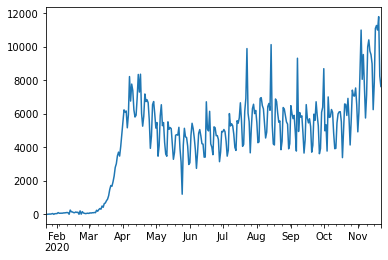

In [ ]:
dd['first diff'].plot()

In [ ]:
da = pd.to_datetime('2020-10-22')
train = dd['first diff'][:da].dropna()
test = dd['first diff'][da:]

In [ ]:

model = SARIMAX(train,order=(2,1,3))

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


                               SARIMAX Results                                
Dep. Variable:             first diff   No. Observations:                  274
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -2224.277
Date:                Sun, 29 Nov 2020   AIC                           4460.555
Time:                        15:24:22   BIC                           4482.212
Sample:                    01-23-2020   HQIC                          4469.248
                         - 10-22-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2379      0.017     70.819      0.000       1.204       1.272
ar.L2         -0.9613      0.017    -57.544      0.000      -0.994      -0.929
ma.L1         -1.9075      0.047    -40.651      0.0

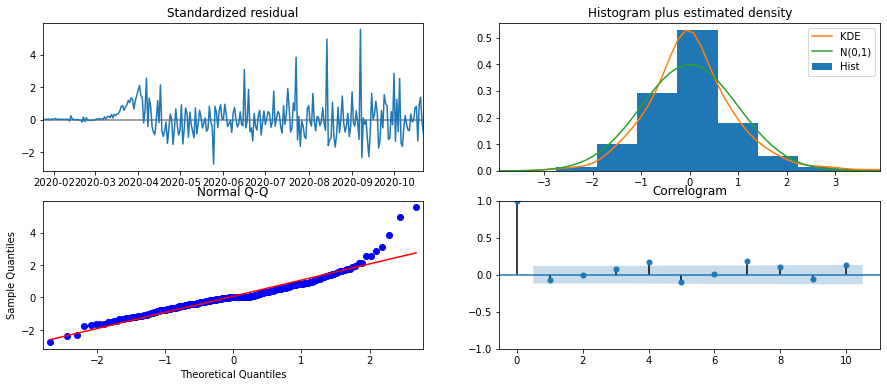

In [ ]:
res = model.fit(disp=True)
res.plot_diagnostics(figsize=(15, 6))
print(res.summary())

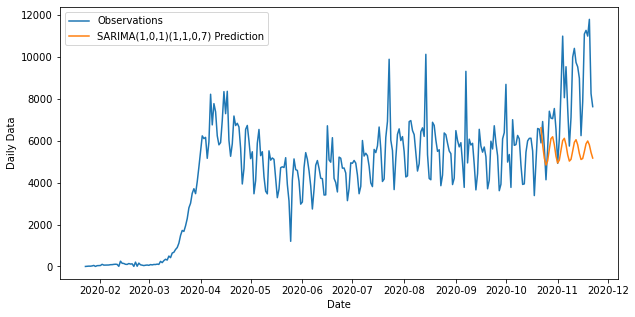

In [ ]:
sarimax_prediction = res.predict(start=da,end='2020-11-22',dynamic=False)
# pred_ci = sarimax_prediction.conf_int()
plt.figure(figsize=(10,5))
l1, = plt.plot(dd['first diff'],label='Observations')
l2, = plt.plot(sarimax_prediction,label='SARIMA(1,0,1)(1,1,0,7) Prediction')
plt.xlabel('Date')
plt.ylabel('Daily Data')
plt.legend(handles=[l1,l2])


In [ ]:
model = pm.auto_arima(train,start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=7,d=None,seasonal=True,start_Q=1,max_Q=2,D=0,trace=True,error_action='ignore',stepwise=True)

Performing stepwise search to minimize aic


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=4602.630, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4780.789, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4692.320, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4683.600, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4778.905, Time=0.01 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=4677.450, Time=0.52 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=4635.834, Time=0.51 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=4621.005, Time=1.26 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=4625.557, Time=1.25 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=4720.860, Time=0.49 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=4647.479, Time=1.13 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=4612.505, Time=0.96 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(2,0,2)[7] intercept   : AIC=4618.875, Time=1.51 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=4584.613, Time=0.63 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=4633.863, Time=0.32 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=1.06 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=4585.896, Time=1.26 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=4744.382, Time=0.23 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=4647.568, Time=0.77 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=4610.902, Time=0.79 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=4621.617, Time=1.51 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=4690.768, Time=0.52 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=4585.993, Time=0.84 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=4622.230, Time=0.65 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=4582.729, Time=0.38 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=4683.205, Time=0.19 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=4632.753, Time=0.16 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(0,1,1)(2,0,1)[7]             : AIC=4583.931, Time=0.97 sec
 ARIMA(0,1,1)(1,0,2)[7]             : AIC=4584.006, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=4744.019, Time=0.08 sec
 ARIMA(0,1,1)(0,0,2)[7]             : AIC=4646.879, Time=0.41 sec
 ARIMA(0,1,1)(2,0,0)[7]             : AIC=4609.328, Time=0.30 sec
 ARIMA(0,1,1)(2,0,2)[7]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,0,1)[7]             : AIC=4688.784, Time=0.30 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(1,0,1)[7]             : AIC=4584.114, Time=0.92 sec
 ARIMA(0,1,2)(1,0,1)[7]             : AIC=4584.051, Time=0.55 sec
 ARIMA(1,1,0)(1,0,1)[7]             : AIC=4620.256, Time=0.58 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(1,0,1)[7]             : AIC=4574.535, Time=0.82 sec
 ARIMA(1,1,2)(0,0,1)[7]             : AIC=4678.847, Time=0.18 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(1,0,0)[7]             : AIC=4636.255, Time=0.59 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(2,0,1)[7]             : AIC=4576.530, Time=1.10 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(1,0,2)[7]             : AIC=4576.563, Time=1.34 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=4719.249, Time=0.19 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,2)[7]             : AIC=4648.410, Time=0.80 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(2,0,0)[7]             : AIC=4607.421, Time=0.71 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(2,0,2)[7]             : AIC=inf, Time=1.86 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,2)(1,0,1)[7]             : AIC=inf, Time=0.82 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,3)(1,0,1)[7]             : AIC=4574.689, Time=0.93 sec
 ARIMA(0,1,3)(1,0,1)[7]             : AIC=4584.947, Time=0.78 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(1,0,1)[7]             : AIC=4586.002, Time=0.62 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(1,0,1)[7]             : AIC=4572.332, Time=1.04 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,0,1)[7]             : AIC=4599.093, Time=0.93 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(1,0,0)[7]             : AIC=4594.483, Time=1.07 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(2,0,1)[7]             : AIC=4591.335, Time=1.67 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(1,0,2)[7]             : AIC=4572.040, Time=1.92 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(0,0,2)[7]             : AIC=4595.176, Time=1.85 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,3)(2,0,2)[7]             : AIC=4595.344, Time=2.22 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,3)(1,0,2)[7]             : AIC=4581.863, Time=1.80 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,2)[7]             : AIC=4587.205, Time=1.44 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(1,0,2)[7]             : AIC=4587.665, Time=2.01 sec


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(3,1,2)(1,0,2)[7]             : AIC=4578.691, Time=1.62 sec
 ARIMA(2,1,3)(1,0,2)[7] intercept   : AIC=4609.284, Time=2.05 sec

Best model:  ARIMA(2,1,3)(1,0,2)[7]          
Total fit time: 55.630 seconds


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [ ]:
dd['second diff'] = dd['first diff'] - dd['first diff'].shift(1)

In [ ]:
# 312 001
mean_squared_error(sarimax_prediction,test)**.5

3056.5122059704186

In [ ]:
#021 011
mean_squared_error(sarimax_prediction,test)

799715.0799264061

In [ ]:
#312
mean_squared_error(sarimax_prediction,test)

3642308.75464205

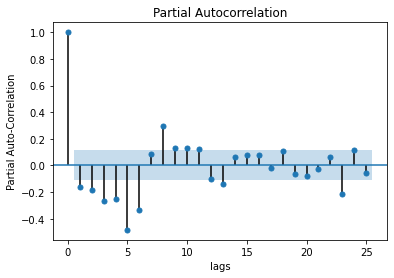

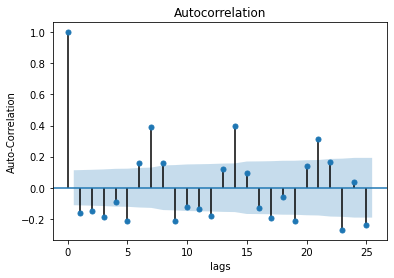

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_pacf(dd['second diff'].dropna())
plt.xlabel('lags')
plt.ylabel('Partial Auto-Correlation')
plot_acf(dd['second diff'].dropna())
plt.xlabel('lags')
plt.ylabel('Auto-Correlation')
pyplot.show()
plt.savefig('ACF.png')

In [ ]:
dd['seasonal first diff'] = dd['first diff'] - dd['first diff'].shift(7)


In [ ]:
dd['seasonal second diff'] = dd['second diff'] - dd['second diff'].shift(7)


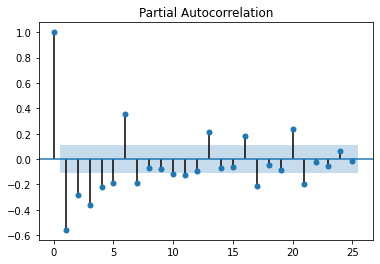

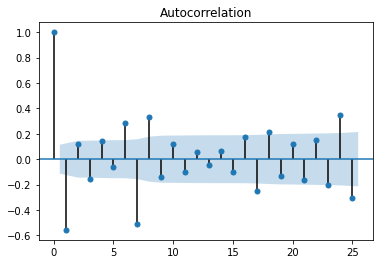

In [ ]:
plot_pacf(dd['seasonal second diff'].dropna())
plot_acf(dd['seasonal second diff'].dropna())
pyplot.show()

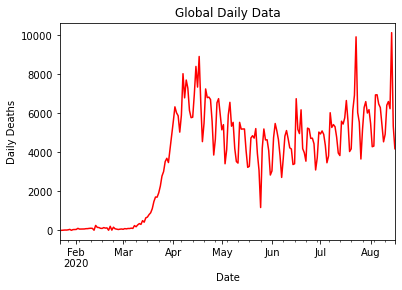

In [ ]:
d['first diff'].plot(color='red',title='Global Daily Data',x='Time',y = 'Daily Number of Deaths')
plt.xlabel("Date")
plt.ylabel("Daily Deaths")
plt.savefig('Daily.png')


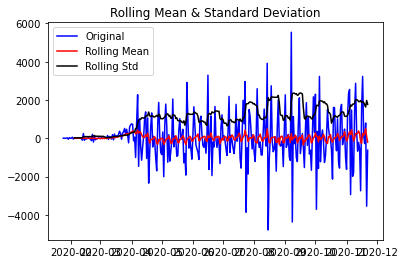

ADF Statistic: -3.9683788562014977
p-value: 0.0015854468874626482
Critical Values:
	1%: -3.4530232710482367
	5%: -2.871523926671883
	10%: -2.5720897694878424


In [ ]:
get_stationarity(dd['second diff'].dropna())

Text(0, 0.5, 'First Difference')

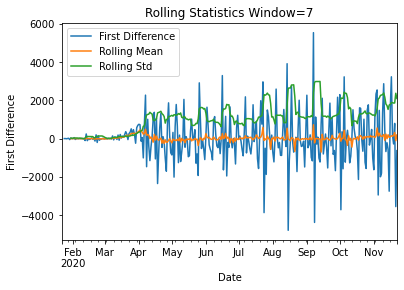

In [ ]:
dd['second diff'].plot(label='First Difference',legend=True)
dd['second diff'].rolling(7).mean().plot(label='Rolling Mean',legend=True)
dd['second diff'].rolling(7).std().plot(label='Rolling Std',legend=True)
plt.title('Rolling Statistics Window=7')
plt.xlabel("Date")
plt.ylabel("First Difference")

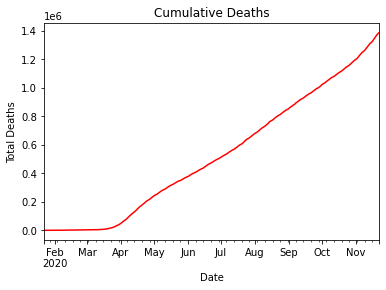

In [ ]:
dd['Deaths'].plot(color='red',title='Cumulative Deaths',x='Time',y = 'Total Number of Deaths')
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.savefig('Cumplot.png')


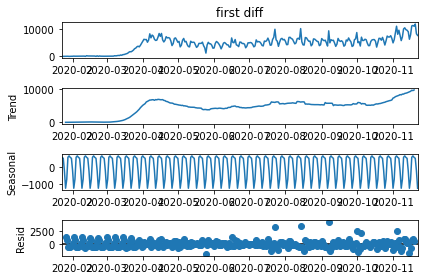

In [ ]:
result = seasonal_decompose(dd['first diff'].dropna(), model='additive')
result.plot()
pyplot.show()

In [ ]:
dd['seasonal diff'] = dd['first diff'] - dd['first diff'].shift(7)

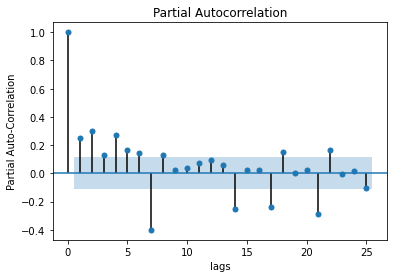

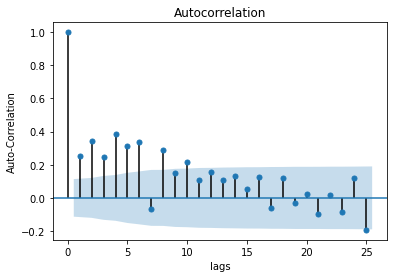

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_pacf(dd['seasonal diff'].dropna())
plt.xlabel('lags')
plt.ylabel('Partial Auto-Correlation')
plot_acf(dd['seasonal diff'].dropna())
plt.xlabel('lags')
plt.ylabel('Auto-Correlation')
pyplot.show()
plt.savefig('ACF.png')

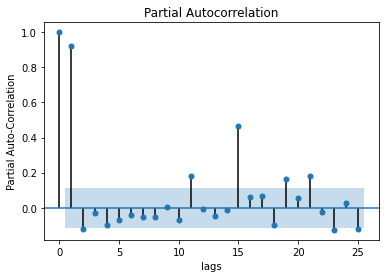

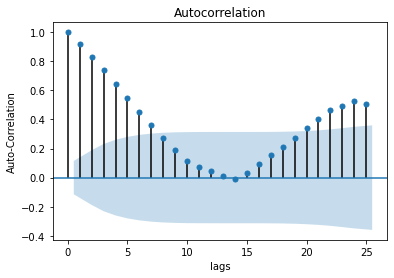

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_pacf(dd['seasonal diff'].rolling(7).std().dropna())
plt.xlabel('lags')
plt.ylabel('Partial Auto-Correlation')
plot_acf(dd['seasonal diff'].rolling(7).std().dropna())
plt.xlabel('lags')
plt.ylabel('Auto-Correlation')
pyplot.show()
plt.savefig('ACF.png')